In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#user_one="/content/drive/MyDrive/datasets/extrasensory_dataset/0A986513-7828-4D53-AA1F-E02D6DF9561B.features_labels.csv.gz"


#user_five="/content/drive/MyDrive/datasets/extrasensory_dataset/0BFC35E2-4817-4865-BFA7-764742302A2D.features_labels.csv.gz"
user_one="/content/drive/MyDrive/datasets/extrasensory_dataset/0E6184E1-90C0-48EE-B25A-F1ECB7B9714E.features_labels.csv.gz"

In [3]:
df_one=pd.read_csv(user_one)

In [4]:
M_PI=3.1416

In [5]:
def compute_roll_yaw_pitch(x,y,z):
  #Acceleration around X
  acc_x_accl=[]

  #Acceleration around Y
  acc_y_accl=[]

  #Acceleration arounf Z
  acc_z_accl=[]


  for (x_mean,y_mean,z_mean) in zip(x,y,z):
    acc_x_accl.append(float("{:.2f}".format(x_mean*3.9)))
    acc_y_accl.append(float("{:.2f}".format(y_mean*3.9)))
    acc_z_accl.append(float("{:.2f}".format(z_mean*3.9)))


  acc_pitch=[]
  acc_roll=[]
  acc_yaw=[]

  for (acc_x,acc_y,acc_z) in zip(acc_x_accl,acc_y_accl,acc_z_accl):
    if acc_y==0 and acc_z==0:
      value_pitch=-0.1
    else:
      value_pitch=180 * math.atan (acc_x/math.sqrt(acc_y*acc_y + acc_z*acc_z))/M_PI
    if acc_x ==0 and acc_z==0:
      value_roll=-0.1
      value_yaw=-0.1
    else:
      value_roll = 180 * math.atan (acc_y/math.sqrt(acc_x*acc_x + acc_z*acc_z))/M_PI
      value_yaw = 180 * math.atan (acc_z/math.sqrt(acc_x*acc_x + acc_z*acc_z))/M_PI
    value_pitch=float("{:.2f}".format(value_pitch))
    value_roll=float("{:.2f}".format(value_roll))
    value_yaw=float("{:.2f}".format(value_yaw))
    acc_pitch.append(value_pitch)
    acc_roll.append(value_roll)
    acc_yaw.append(value_yaw)
  return acc_pitch,acc_roll,acc_yaw


**Window Sliding Method to fill the NULL values**

In [6]:
import numpy as np

In [7]:
df_acc=df_one.iloc[:,1:27]


In [8]:
df_acc.columns

Index(['raw_acc:magnitude_stats:mean', 'raw_acc:magnitude_stats:std',
       'raw_acc:magnitude_stats:moment3', 'raw_acc:magnitude_stats:moment4',
       'raw_acc:magnitude_stats:percentile25',
       'raw_acc:magnitude_stats:percentile50',
       'raw_acc:magnitude_stats:percentile75',
       'raw_acc:magnitude_stats:value_entropy',
       'raw_acc:magnitude_stats:time_entropy',
       'raw_acc:magnitude_spectrum:log_energy_band0',
       'raw_acc:magnitude_spectrum:log_energy_band1',
       'raw_acc:magnitude_spectrum:log_energy_band2',
       'raw_acc:magnitude_spectrum:log_energy_band3',
       'raw_acc:magnitude_spectrum:log_energy_band4',
       'raw_acc:magnitude_spectrum:spectral_entropy',
       'raw_acc:magnitude_autocorrelation:period',
       'raw_acc:magnitude_autocorrelation:normalized_ac', 'raw_acc:3d:mean_x',
       'raw_acc:3d:mean_y', 'raw_acc:3d:mean_z', 'raw_acc:3d:std_x',
       'raw_acc:3d:std_y', 'raw_acc:3d:std_z', 'raw_acc:3d:ro_xy',
       'raw_acc:3d:ro_xz', 

In [9]:
len(df_acc['raw_acc:magnitude_stats:mean'])

7521

In [10]:
values=[12,12,12,12,34,45,56,67,78,45,56,78,89,90,7,45,34,23,34,45,56]
values[10-5:10]

[45, 56, 67, 78, 45]

In [11]:
#Sliding Window
def fill_null(data):
  for col in data.columns:
    null_indexes=data[data[col].isnull()].index.tolist()
    print("For ",col)
    for ind in null_indexes:
      print(" Got null value at ",ind)
      values=data.loc[ind-6:ind-1,col]
      print(" Last 5 values ",values)
      mean_val=values.mean()
      data.loc[ind,col]=mean_val
  return data





In [12]:
#accelerometer
df_acc=df_one.iloc[:,1:27]
df_acc=fill_null(df_acc)
#gyroscope
df_gyro=df_one.iloc[:,27:53]
df_gyro=fill_null(df_gyro)
#magnometer
df_magnet=df_one.iloc[:,53:84]
df_magnet=fill_null(df_magnet)
# watch accelerometer
df_watch_acc=df_one.iloc[:,84:130]
# location
df_location=df_one.iloc[:,139:156]

#selecting only coordinated values
df_acc_sensors=df_acc.iloc[:,-9:]




"""
#Acceleration around X
acc_x_accl=[]

#Acceleration around Y
acc_y_accl=[]

#Acceleration arounf Z
acc_z_accl=[]


for (x_mean,y_mean,z_mean) in zip(acc_mean_x,acc_mean_y,acc_mean_z):
  acc_x_accl.append(float("{:.2f}".format(x_mean*3.9)))
  acc_y_accl.append(float("{:.2f}".format(y_mean*3.9)))
  acc_z_accl.append(float("{:.2f}".format(z_mean*3.9)))


acc_pitch=[]
acc_roll=[]
acc_yaw=[]
for (acc_x,acc_y,acc_z) in zip(acc_x_accl,acc_y_accl,acc_z_accl):
  value_pitch=180 * math.atan (acc_x/math.sqrt(acc_y*acc_y + acc_z*acc_z))/M_PI
  if acc_x ==0 and acc_z==0:
    value_roll=-0.1
    value_yaw=-0.1
  else:
    value_roll = 180 * math.atan (acc_y/math.sqrt(acc_x*acc_x + acc_z*acc_z))/M_PI
    value_yaw = 180 * math.atan (acc_z/math.sqrt(acc_x*acc_x + acc_z*acc_z))/M_PI
  value_pitch=float("{:.2f}".format(value_pitch))
  value_roll=float("{:.2f}".format(value_roll))
  value_yaw=float("{:.2f}".format(value_yaw))
  acc_pitch.append(value_pitch)
  acc_roll.append(value_roll)
  acc_yaw.append(value_yaw)
"""



Streaming output truncated to the last 5000 lines.
 Got null value at  3437
 Last 5 values  3431    0.924215
3432    0.975072
3433    0.882199
3434    0.963301
3435    0.960016
3436    0.999969
Name: raw_magnet:avr_cosine_similarity_lag_range4, dtype: float64
 Got null value at  3439
 Last 5 values  3433    0.882199
3434    0.963301
3435    0.960016
3436    0.999969
3437    0.950795
3438    0.989131
Name: raw_magnet:avr_cosine_similarity_lag_range4, dtype: float64
 Got null value at  3440
 Last 5 values  3434    0.963301
3435    0.960016
3436    0.999969
3437    0.950795
3438    0.989131
3439    0.957569
Name: raw_magnet:avr_cosine_similarity_lag_range4, dtype: float64
 Got null value at  3442
 Last 5 values  3436    0.999969
3437    0.950795
3438    0.989131
3439    0.957569
3440    0.970130
3441    0.921318
Name: raw_magnet:avr_cosine_similarity_lag_range4, dtype: float64
 Got null value at  3444
 Last 5 values  3438    0.989131
3439    0.957569
3440    0.970130
3441    0.921318
3442

'\n#Acceleration around X\nacc_x_accl=[]\n\n#Acceleration around Y\nacc_y_accl=[]\n\n#Acceleration arounf Z\nacc_z_accl=[]\n\n\nfor (x_mean,y_mean,z_mean) in zip(acc_mean_x,acc_mean_y,acc_mean_z):\n  acc_x_accl.append(float("{:.2f}".format(x_mean*3.9)))\n  acc_y_accl.append(float("{:.2f}".format(y_mean*3.9)))\n  acc_z_accl.append(float("{:.2f}".format(z_mean*3.9)))\n\n\nacc_pitch=[]\nacc_roll=[]\nacc_yaw=[]\nfor (acc_x,acc_y,acc_z) in zip(acc_x_accl,acc_y_accl,acc_z_accl):\n  value_pitch=180 * math.atan (acc_x/math.sqrt(acc_y*acc_y + acc_z*acc_z))/M_PI\n  if acc_x ==0 and acc_z==0:\n    value_roll=-0.1\n    value_yaw=-0.1\n  else:\n    value_roll = 180 * math.atan (acc_y/math.sqrt(acc_x*acc_x + acc_z*acc_z))/M_PI\n    value_yaw = 180 * math.atan (acc_z/math.sqrt(acc_x*acc_x + acc_z*acc_z))/M_PI\n  value_pitch=float("{:.2f}".format(value_pitch))\n  value_roll=float("{:.2f}".format(value_roll))\n  value_yaw=float("{:.2f}".format(value_yaw))\n  acc_pitch.append(value_pitch)\n  acc_roll.ap

In [13]:
df_magnet.isnull().sum()

raw_magnet:magnitude_stats:mean                       0
raw_magnet:magnitude_stats:std                        0
raw_magnet:magnitude_stats:moment3                    0
raw_magnet:magnitude_stats:moment4                    0
raw_magnet:magnitude_stats:percentile25               0
raw_magnet:magnitude_stats:percentile50               0
raw_magnet:magnitude_stats:percentile75               0
raw_magnet:magnitude_stats:value_entropy              0
raw_magnet:magnitude_stats:time_entropy               0
raw_magnet:magnitude_spectrum:log_energy_band0        0
raw_magnet:magnitude_spectrum:log_energy_band1        0
raw_magnet:magnitude_spectrum:log_energy_band2        0
raw_magnet:magnitude_spectrum:log_energy_band3        0
raw_magnet:magnitude_spectrum:log_energy_band4        0
raw_magnet:magnitude_spectrum:spectral_entropy        0
raw_magnet:magnitude_autocorrelation:period           0
raw_magnet:magnitude_autocorrelation:normalized_ac    0
raw_magnet:3d:mean_x                            

In [14]:
# For accelerometer
#mean values
acc_mean_x=df_acc_sensors['raw_acc:3d:mean_x']
acc_mean_y=df_acc_sensors['raw_acc:3d:mean_y']
acc_mean_z=df_acc_sensors['raw_acc:3d:mean_z']

acc_mean_x=acc_mean_x.replace({0:0.001})

#standard deviations
acc_std_x=df_acc_sensors['raw_acc:3d:std_x']
acc_std_y=df_acc_sensors['raw_acc:3d:std_y']
acc_std_z=df_acc_sensors['raw_acc:3d:std_z']

(pitch,roll,yaw)=compute_roll_yaw_pitch(acc_mean_x,acc_mean_y,acc_mean_z)
df_one['acc_pitch']=pitch
df_one['acc_roll']=roll
df_one['acc_yaw']=yaw

In [15]:
#for gyroscope
gyro_mean_x=df_gyro['proc_gyro:3d:mean_x']
gyro_mean_y=df_gyro['proc_gyro:3d:mean_y']
gyro_mean_z=df_gyro['proc_gyro:3d:mean_z']

(pitch,roll,yaw)=compute_roll_yaw_pitch(gyro_mean_x,gyro_mean_y,gyro_mean_z)

df_one['gyro_pitch']=pitch
df_one['gyro_roll']=roll
df_one['gyro_yaw']=yaw

In [16]:
df_magnet.columns[-20:]

Index(['raw_magnet:magnitude_spectrum:log_energy_band2',
       'raw_magnet:magnitude_spectrum:log_energy_band3',
       'raw_magnet:magnitude_spectrum:log_energy_band4',
       'raw_magnet:magnitude_spectrum:spectral_entropy',
       'raw_magnet:magnitude_autocorrelation:period',
       'raw_magnet:magnitude_autocorrelation:normalized_ac',
       'raw_magnet:3d:mean_x', 'raw_magnet:3d:mean_y', 'raw_magnet:3d:mean_z',
       'raw_magnet:3d:std_x', 'raw_magnet:3d:std_y', 'raw_magnet:3d:std_z',
       'raw_magnet:3d:ro_xy', 'raw_magnet:3d:ro_xz', 'raw_magnet:3d:ro_yz',
       'raw_magnet:avr_cosine_similarity_lag_range0',
       'raw_magnet:avr_cosine_similarity_lag_range1',
       'raw_magnet:avr_cosine_similarity_lag_range2',
       'raw_magnet:avr_cosine_similarity_lag_range3',
       'raw_magnet:avr_cosine_similarity_lag_range4'],
      dtype='object')

In [17]:
# For magnetometer
magno_mean_x=df_magnet['raw_magnet:3d:mean_x']
magno_mean_y=df_magnet['raw_magnet:3d:mean_y']
magno_mean_z=df_magnet['raw_magnet:3d:mean_z']

(pitch,roll,yaw)=compute_roll_yaw_pitch(magno_mean_x,magno_mean_y,magno_mean_z)

df_one['magno_pitch']=pitch
df_one['magno_roll']=roll
df_one['magno_yaw']=yaw

In [18]:
df_one.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label_source,acc_pitch,acc_roll,acc_yaw,gyro_pitch,gyro_roll,gyro_yaw,magno_pitch,magno_roll,magno_yaw
0,1448907005,1.026050,0.004956,-0.011147,0.020062,1.024622,1.026169,1.027758,0.784843,6.684600,...,2,-2.15,-0.00,44.98,-49.68,-27.23,-27.23,26.75,-10.65,-41.63
1,1448907060,1.026225,0.064620,-0.061327,0.172650,1.022154,1.024484,1.026789,0.671550,6.682509,...,2,-2.17,0.14,44.98,-31.19,-39.27,-36.62,51.74,-16.82,-29.77
2,1448907120,1.026042,0.013626,0.013009,0.035978,1.023549,1.025964,1.027842,0.583047,6.684524,...,2,-0.43,-1.43,45.00,-49.68,-27.23,-27.23,56.65,-9.12,-28.07
3,1448907331,1.027755,0.048011,0.056932,0.106184,1.021865,1.024913,1.027899,0.921563,6.683540,...,2,-0.43,-0.00,45.00,-6.55,-0.93,-44.81,44.28,-12.44,-34.96
4,1448907413,1.026951,0.004087,-0.004915,0.012900,1.025302,1.026997,1.028592,0.914141,6.684604,...,2,-1.29,0.57,44.99,-49.68,-27.23,-27.23,32.29,-22.36,-39.22


In [19]:
X=df_one.iloc[:,-9:]

In [20]:
X.describe()

,acc_pitch,acc_roll,acc_yaw,gyro_pitch,gyro_roll,gyro_yaw,magno_pitch,magno_roll,magno_yaw
count,7521.000000,7521.000000,7521.000000,7521.000000,7521.000000,7521.000000,7521.000000,7521.000000,7521.000000
mean,6.677042,0.898799,-5.688350,-38.398444,-21.738993,-23.585100,33.424311,-19.072131,2.652670
std,24.287292,29.683636,39.925973,23.514043,24.518335,18.739345,39.769305,19.154043,27.413282
min,-88.070000,-89.700000,-45.000000,-88.440000,-87.880000,-45.000000,-89.100000,-86.540000,-44.990000
25%,-1.640000,-0.570000,-44.980000,-49.680000,-33.850000,-32.630000,30.450000,-29.900000,-24.570000
50%,-0.590000,1.040000,-14.890000,-45.820000,-25.100000,-29.020000,46.800000,-21.410000,6.320000
75%,4.090000,8.270000,44.870000,-40.610000,-18.020000,-24.090000,59.220000,-6.500000,29.580000
max,89.790000,87.800000,45.000000,87.800000,88.690000,45.000000,88.650000,72.860000,45.000000


In [21]:
y=df_one[['label:FIX_running','label:FIX_walking','label:SITTING','label:SLEEPING','label:OR_standing']]

In [22]:
# to avoid null values
y['label:FIX_running']=y['label:FIX_running'].fillna(0)
y['label:FIX_walking']=y['label:FIX_walking'].fillna(0)
y['label:SITTING']=y['label:SITTING'].fillna(0)
y['label:SLEEPING']=y['label:SLEEPING'].fillna(0)
y['label:OR_standing']=y['label:OR_standing'].fillna(0)

<ipython-input-22-e5b87cc6690c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['label:FIX_running']=y['label:FIX_running'].fillna(0)
<ipython-input-22-e5b87cc6690c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['label:FIX_walking']=y['label:FIX_walking'].fillna(0)
<ipython-input-22-e5b87cc6690c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [23]:
y.describe()

,label:FIX_running,label:FIX_walking,label:SITTING,label:SLEEPING,label:OR_standing
count,7521.0,7521.000000,7521.000000,7521.000000,7521.000000
mean,0.0,0.203696,0.410717,0.174445,0.115144
std,0.0,0.402773,0.491997,0.379517,0.319217
min,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,1.000000,0.000000,0.000000
max,0.0,1.000000,1.000000,1.000000,1.000000


In [24]:
len(df_one)

7521

In [25]:
#Check rows where all the recorded activities are zero ~ No activity recorded rows
list_of_indexs=[]
for i in range(len(y)):
  run=y.iloc[i,0]
  walk=y.iloc[i,1]
  sit=y.iloc[i,2]
  sleep=y.iloc[i,3]
  stand=y.iloc[i,4]
  activities=[run,walk,sit,sleep,stand]
  count_ones=activities.count(1)
  if walk==0 and run==0 and sit==0 and sleep==0 and stand==0:
    list_of_indexs.append(i)
  #check if more then 1 exists for different activities
  elif count_ones>1:
    list_of_indexs.append(i)

  #print(run,walk,sit,sleep,stand)

In [26]:
y=y.drop(list_of_indexs)
X=X.drop(list_of_indexs)

In [27]:
list_of_indexs

[108,
 444,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 1267,
 1363,
 1364,
 1365,
 1366,
 1367,
 1368,
 1369,
 1370,
 1371,
 1372,
 1373,
 1374,
 1375,
 1376,
 1377,
 1378,
 1813,
 1814,
 1815,
 1816,
 1817,
 1818,
 1819,
 1820,
 1821,
 1822,
 1823,
 1824,
 1825,
 1826,
 1827,
 1828,
 1829,
 1830,
 1831,
 1832,
 1833,
 1834,
 1835,
 1836,
 1837,
 1838,
 1839,
 1840,
 1841,
 1842,
 1843,
 1844,
 1845,
 1846,
 1847,
 1848,
 1849,
 1850,
 1851,
 1852,
 1853,
 1854,
 1855,
 1856,
 1857,
 1858,
 1859,
 1860,
 1861,
 1862,
 1863,
 1864,
 1865,
 1866,
 1867,
 1868,
 1869,
 1870,
 1871,
 1872,
 1873,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,

In [28]:
df_acc_=X[['acc_pitch','acc_roll','acc_yaw']]
df_magno_=X[['magno_pitch','magno_roll','magno_yaw']]
df_gyro_=X[['gyro_pitch','gyro_roll','gyro_yaw']]

In [29]:
X.head()

,acc_pitch,acc_roll,acc_yaw,gyro_pitch,gyro_roll,gyro_yaw,magno_pitch,magno_roll,magno_yaw
0,-2.15,-0.00,44.98,-49.68,-27.23,-27.23,26.75,-10.65,-41.63
1,-2.17,0.14,44.98,-31.19,-39.27,-36.62,51.74,-16.82,-29.77
2,-0.43,-1.43,45.00,-49.68,-27.23,-27.23,56.65,-9.12,-28.07
3,-0.43,-0.00,45.00,-6.55,-0.93,-44.81,44.28,-12.44,-34.96
4,-1.29,0.57,44.99,-49.68,-27.23,-27.23,32.29,-22.36,-39.22


#**Outliers Detection**

**1. Accelerometer**

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Yaw')

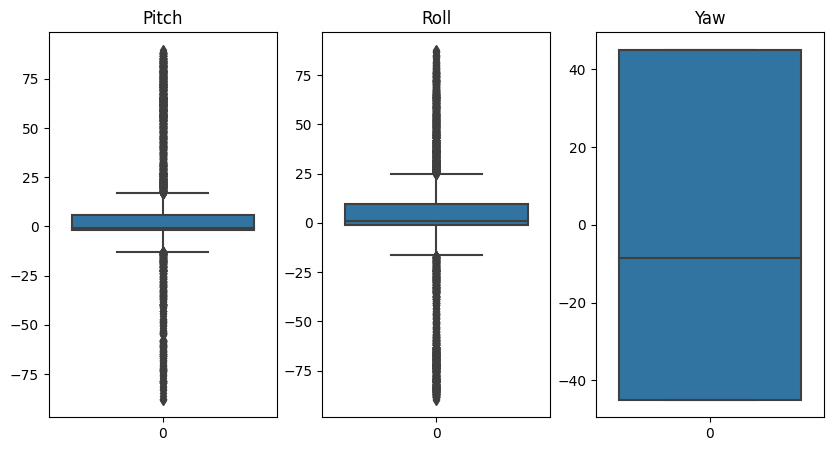

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.boxplot(X['acc_pitch'])
plt.title("Pitch")

plt.subplot(132)
sns.boxplot(X['acc_roll'])
plt.title("Roll")

plt.subplot(133)
sns.boxplot(X['acc_yaw'])
plt.title("Yaw")



**2. Magnetometer**

Text(0.5, 1.0, 'Yaw')

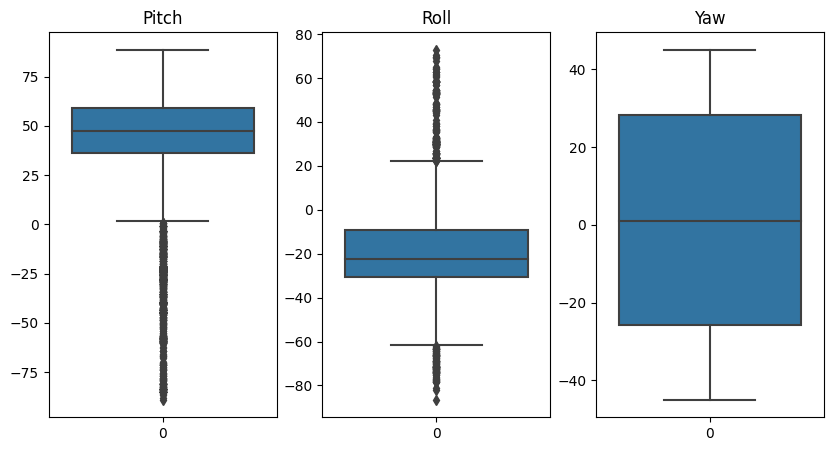

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.boxplot(X['magno_pitch'])
plt.title("Pitch")

plt.subplot(132)
sns.boxplot(X['magno_roll'])
plt.title("Roll")

plt.subplot(133)
sns.boxplot(X['magno_yaw'])
plt.title("Yaw")

**3. Gyroscope**

Text(0.5, 1.0, 'Yaw')

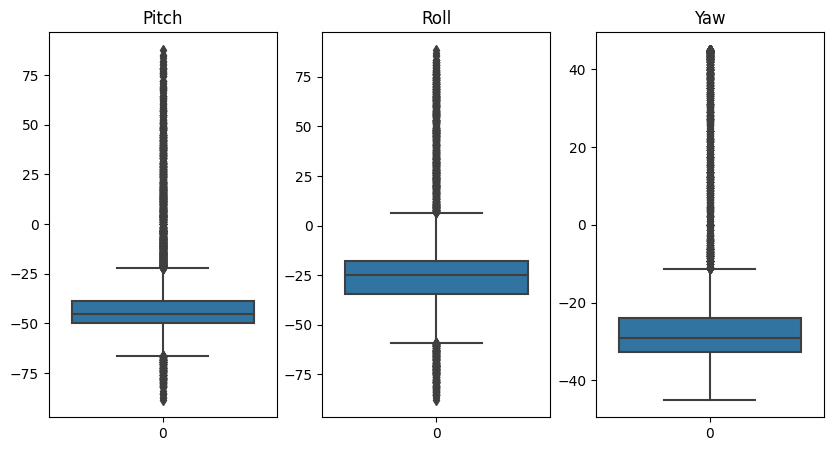

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.boxplot(X['gyro_pitch'])
plt.title("Pitch")

plt.subplot(132)
sns.boxplot(X['gyro_roll'])
plt.title("Roll")

plt.subplot(133)
sns.boxplot(X['gyro_yaw'])
plt.title("Yaw")

In [34]:
from sklearn.decomposition import PCA

In [35]:
len(list_of_indexs)

756

In [36]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# ANN

In [37]:
input_dim = X.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(8, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


In [38]:
#Reverse One-Hot Encoding
a=np.array(y)
y=np.where(a)[1]


In [39]:
print(y)

[2 2 2 ... 2 2 2]


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# Recurrent Neural Network (RNN)

In [41]:
X_train.shape

(5073, 9)

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

# Implementation # 1

In [43]:
'''
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(9, 1)))

model.add(Dense(5))
model.compile(loss='categorical_crossentropy', metrics=["accuracy"],optimizer='adam')
model.fit(X_train, y_train, epochs=25, batch_size=5)
'''

'\n# create and fit the LSTM network\nmodel = Sequential()\nmodel.add(LSTM(7, input_shape=(9, 1)))\n\nmodel.add(Dense(5))\nmodel.compile(loss=\'categorical_crossentropy\', metrics=["accuracy"],optimizer=\'adam\')\nmodel.fit(X_train, y_train, epochs=25, batch_size=5)\n'

**1D CNN**

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [46]:
#n_timesteps, n_features, n_outputs = X_train.shape[0], X_train.shape[1], y_train.shape[0]

In [47]:
#y_train=to_categorical(y_train)
#y_test=to_categorical(y_test)

In [48]:
#y_train

In [49]:
#n_features

In [50]:
#n_timesteps

In [51]:
X_train.shape

(5073, 9)

In [52]:
y_train.shape

(5073,)

In [53]:
#CNN
#Reshape train and test data to (n_samples, 187, 1), where each sample is of size (187, 1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
#print("X Train shape: ", X_train.shape)
#print("X Test shape: ", X_test.shape)
#y_train=np.array(y_train).reshape(y_train.shape[0],y_train.shape[1],1)
#y_test=np.array(y_test).reshape(y_test.shape[0],y_test.shape[1],1)
# Create sequential model
cnn_model = tf.keras.models.Sequential()
#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 16, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 8, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with five outputs
cnn_model.add(Dense(units = 5, activation='softmax'))

In [54]:
epochs=10
verbose=0
batch_size=32

In [55]:
set(y_test)

{1, 2, 3, 4}

In [56]:
cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [57]:
cnn_model.fit(X_train, y_train, epochs=40, batch_size = 10)

Epoch 1/40
508/508 [==============================] - 4s 4ms/step - loss: 1.0784 - accuracy: 0.5920
Epoch 2/40
508/508 [==============================] - 4s 8ms/step - loss: 0.8171 - accuracy: 0.6937
Epoch 3/40
508/508 [==============================] - 3s 5ms/step - loss: 0.7582 - accuracy: 0.7077
Epoch 4/40
508/508 [==============================] - 2s 5ms/step - loss: 0.7167 - accuracy: 0.7223
Epoch 5/40
508/508 [==============================] - 2s 4ms/step - loss: 0.6770 - accuracy: 0.7353
Epoch 6/40
508/508 [==============================] - 2s 4ms/step - loss: 0.6606 - accuracy: 0.7439
Epoch 7/40
508/508 [==============================] - 3s 5ms/step - loss: 0.6265 - accuracy: 0.7546
Epoch 8/40
508/508 [==============================] - 3s 7ms/step - loss: 0.6149 - accuracy: 0.7585
Epoch 9/40
508/508 [==============================] - 2s 4ms/step - loss: 0.6040 - accuracy: 0.7658
Epoch 10/40
508/508 [==============================] - 2s 4ms/step - loss: 0.5846 - accuracy: 0.7694

In [58]:
set(y_train)

{1, 2, 3, 4}

In [59]:
# Evaluate the model on the test data
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)

In [60]:
test_acc

0.7848699688911438

In [61]:
# assign location
path='/content/drive/MyDrive/datasets/extra_sense_1D_model_weights/'

# save
cnn_model.save_weights(path)

In [62]:
cnn_model.save('1DSensoryCNN.h5')

In [63]:
cnn_model.history.history

{}

In [64]:
cnn_model.evaluate(X_train,y_train)

159/159 [==============================] - 0s 3ms/step - loss: 0.3700 - accuracy: 0.8535


[0.3700104355812073, 0.8535383343696594]

In [65]:
cnn_model.evaluate(X_test,y_test)

53/53 [==============================] - 0s 3ms/step - loss: 0.6024 - accuracy: 0.7849


[0.6024423241615295, 0.7848699688911438]